In [30]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [31]:
"""You can do it with a special library from scipy.ndimage import gaussian_filter
But in this case we are going to do in a basic way to see the truth proccess"""

'You can do it with a special library from scipy.ndimage import gaussian_filter\nBut in this case we are going to do in a basic way to see the truth proccess'

In [32]:
def gaussian_filter(image, kernel_size=5, sigma=1.0):
    """
    Apply Gaussian filter to a grayscale image.
    
    Parameters:
        image (numpy.ndarray): Input grayscale image (2D array).
        kernel_size (int): Size of the Gaussian kernel (odd number).
        sigma (float): Standard deviation of the Gaussian distribution.
        
    Returns:
        numpy.ndarray: Blurred image.
    """
    # Create Gaussian kernel
    ax = np.linspace(-(kernel_size // 2), kernel_size // 2, kernel_size)
    gaussian = np.exp(-0.5 * (ax / sigma) ** 2)
    kernel_1d = gaussian / gaussian.sum()
    kernel_2d = np.outer(kernel_1d, kernel_1d)

    # Apply convolution
    padded_image = np.pad(image, kernel_size // 2, mode='edge')
    filtered_image = np.zeros_like(image, dtype=np.float32)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            region = padded_image[i:i + kernel_size, j:j + kernel_size]
            filtered_image[i, j] = np.sum(region * kernel_2d)

    return np.clip(filtered_image, 0, 255).astype(np.uint8)


In [33]:
def median_filter(image, kernel_size=3):
    """
    Apply Median filter to a grayscale image.
    
    Parameters:
        image (numpy.ndarray): Input grayscale image (2D array).
        kernel_size (int): Size of the kernel (odd number).
        
    Returns:
        numpy.ndarray: Image after applying the Median filter.
    """

    if kernel_size % 2 == 0:
        raise ValueError("Kernel size must be an odd number.")
    
    # Calcular el padding necesario
    pad_size = kernel_size // 2
    padded_image = np.pad(image, pad_size, mode='edge')
    filtered_image = np.zeros_like(image, dtype=np.uint8)
    
    # Aplicar la convolución manual
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            # Extraer la región alrededor del píxel actual
            region = padded_image[i:i + kernel_size, j:j + kernel_size]
            # Calcular la mediana de la región
            filtered_image[i, j] = np.median(region)
    
    return filtered_image

In [34]:
def wavelet_transform(image, threshold=30):
    """
    Apply a basic 2D wavelet transform for noise reduction.
    
    Parameters:
        image (numpy.ndarray): Input grayscale image (2D array).
        threshold (float): Threshold for denoising high-frequency components.
        
    Returns:
        numpy.ndarray: Denoised image.
    """
    # Paso 1: Descomposición por Wavelets (Haar)
    h, w = image.shape
    half_h, half_w = h // 2, w // 2

    # Crear sub-bandas
    LL = (image[0:h:2, 0:w:2] + image[1:h:2, 0:w:2] + 
          image[0:h:2, 1:w:2] + image[1:h:2, 1:w:2]) / 4

    LH = (image[0:h:2, 0:w:2] + image[1:h:2, 0:w:2] - 
          image[0:h:2, 1:w:2] - image[1:h:2, 1:w:2]) / 4

    HL = (image[0:h:2, 0:w:2] - image[1:h:2, 0:w:2] + 
          image[0:h:2, 1:w:2] - image[1:h:2, 1:w:2]) / 4

    HH = (image[0:h:2, 0:w:2] - image[1:h:2, 0:w:2] - 
          image[0:h:2, 1:w:2] + image[1:h:2, 1:w:2]) / 4

    # Paso 2: Aplicar umbral a los componentes de alta frecuencia
    LH = np.where(np.abs(LH) > threshold, LH, 0)
    HL = np.where(np.abs(HL) > threshold, HL, 0)
    HH = np.where(np.abs(HH) > threshold, HH, 0)

    # Paso 3: Reconstrucción de la imagen
    result = np.zeros_like(image, dtype=np.float32)
    for i in range(half_h):
        for j in range(half_w):
            result[2 * i, 2 * j] = LL[i, j] + LH[i, j] + HL[i, j] + HH[i, j]
            result[2 * i + 1, 2 * j] = LL[i, j] + LH[i, j] - HL[i, j] - HH[i, j]
            result[2 * i, 2 * j + 1] = LL[i, j] - LH[i, j] + HL[i, j] - HH[i, j]
            result[2 * i + 1, 2 * j + 1] = LL[i, j] - LH[i, j] - HL[i, j] + HH[i, j]
    
    return np.clip(result, 0, 255).astype(np.uint8)

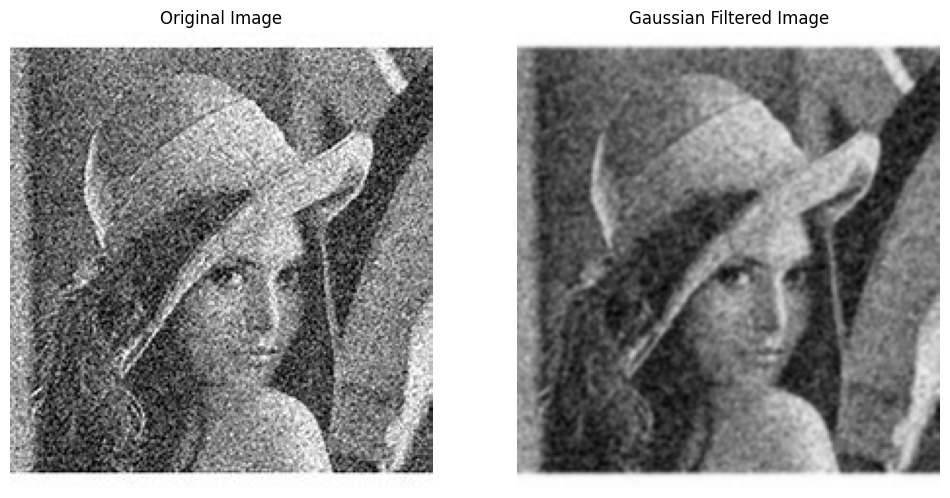

In [35]:
image_path = r"C:\Users\javie\Downloads\gaussian.jpg"  # Cambia esta ruta
original_image = Image.open(image_path).convert("L")
image_array = np.array(original_image)

# Aplicar el filtro Gaussiano
filtered_image = gaussian_filter(image_array, kernel_size=7, sigma=1.0)

# Mostrar resultados
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image_array, cmap="gray")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Gaussian Filtered Image")
plt.imshow(filtered_image, cmap="gray")
plt.axis("off")

plt.show()

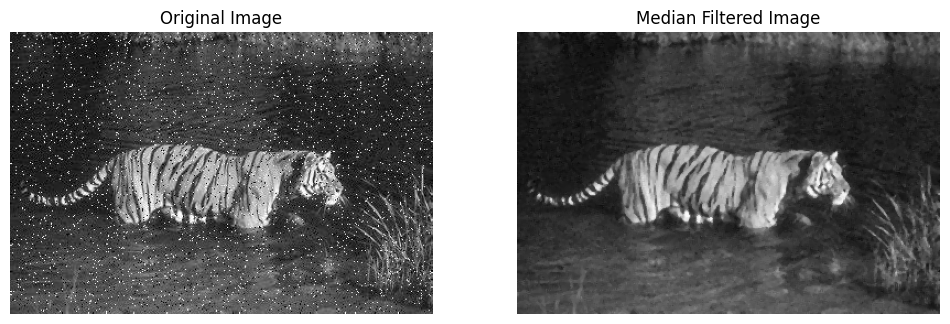

In [36]:
# Cargar la imagen desde un archivo
image_path = r"C:\Users\javie\Downloads\salt-and-pepper.jpg"  # Cambia esta ruta
original_image = Image.open(image_path).convert("L")
image_array = np.array(original_image)

# Aplicar el filtro de mediana
filtered_image = median_filter(image_array, kernel_size=3)

# Mostrar los resultados
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image_array, cmap="gray")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Median Filtered Image")
plt.imshow(filtered_image, cmap="gray")
plt.axis("off")

plt.show()

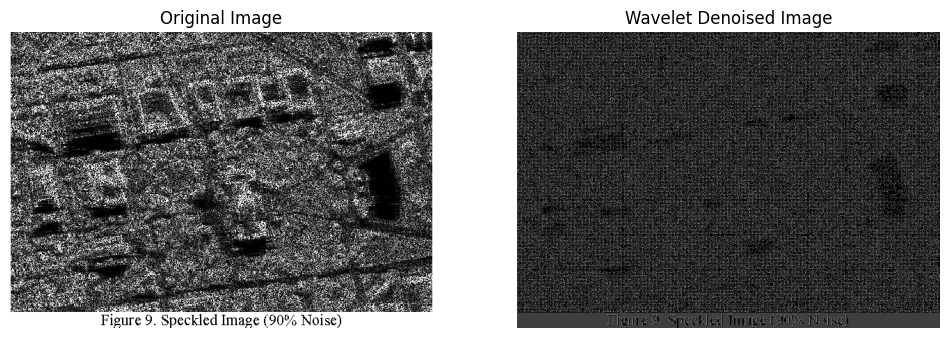

In [29]:
# Cargar la imagen desde un archivo
image_path = r"C:\Users\javie\Downloads\speckle.png"  # Cambia esta ruta
original_image = Image.open(image_path).convert("L")
image_array = np.array(original_image)

# Aplicar la transformación wavelet para reducción de ruido
filtered_image = wavelet_transform(image_array, threshold=30)

# Mostrar los resultados
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image_array, cmap="gray")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Wavelet Denoised Image")
plt.imshow(filtered_image, cmap="gray")
plt.axis("off")

plt.show()